In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [2]:
# Read in the data.
df = pd.read_csv('train.csv', sep= ',')

C:\Users\xps\anaconda3\envs\Need\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


EDA and pre-processing

In [3]:
df

,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
0,1430158023,VT56YgANZ5sK24hIAgB7+w==,a2304e2d-dd95-4431-a06e-9b976b83781f,CAESEJ5yQ9WDEoC_KMd3DzKeKl0,320x480,200000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544489,280000000,116000000,0
1,1430158024,VT56ZAAAeWMKNCwO6ABg+w==,fdef5b70-64c3-4afa-8e0e-8587bd4887e2,CAESEJ6WxEBHVaDXLlrXknLTCoA,320x480,1000000,app,353599677,1,ios,tr_TR,iphone,408,1462,1109,16,544489,280000000,195000000,0
2,1430158024,VT56ZAALt/oKG+GTGwB6sg==,db4cfc36-27f7-4e92-8201-d71d9b4d6cf7,CAESEPcNDSPNESnmoWp1Zck6j8A,320x480,199000000,app,911152486,1,ios,fr_FR,ipod,937,926,1462,1536,544489,280000000,241000000,0
3,1430158024,VT56ZAAMtH0KwmKp4AANng==,e113e09f-1899-4f97-94ac-00e243d8ef70,CAESELMvW0Vh_8Uwsio5w99n4qk,320x480,190000000,app,911793120,1,ios,fr_FR,iphone,937,1462,1536,1461,544489,280000000,137000000,0
4,1430158024,VT56ZAAOT5QKfN8IfAAieQ==,96653962-3033-476b-9dff-95d188f52d6d,CAESEKhcSWjJJHrkM-XAEDNaxgE,320x480,188000000,app,484115113,1,ios,fr_FR,iphone,61,13,299,0,544489,280000000,188000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762234,1430264860,VUAbtwAGGEAKG42FkgABtQ==,cab4ae17-6b48-483e-ba68-ad49c8d944a0,CAESEK2HiR6F1ncLdKqp_F6vOF8,320x480,1000000,app,506916707,1,ios,en_EN,iphone,386,384,13,1379,544477,220000000,107000000,0
762235,1430264860,VUAbtwAJi30KG+LFjQA0Qw==,e7252a3d-cb07-4705-9493-19671694be6b,CAESED7WlmK3RFrAi1uOTu7Q8CQ,320x480,1000000,app,765059876,1,ios,zh_CN,iphone,935,933,1462,622,544477,220000000,176000000,0
762236,1430264860,VUAbtwAJ1coKwlTJ1QByUA==,10ea9e5b-9a52-4be3-b613-bd25dcff10f9,CAESENdaf92KkNQMR7ypGCzZ5r0,320x480,197000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544501,220000000,197000000,0
762237,1430264861,VUAbtwAN3P8KG7eDgwA5jQ==,02d5a855-832e-489c-a921-460016c1bdf8,CAESEFernuTamqxQ39uSimmHvTk,320x480,130000000,app,905852173,1,ios,fr_FR,iphone,926,1462,1109,1071,544501,220000000,191000000,0


In [79]:
#df.head()
#df.iloc[::]


In [5]:
df.columns

Index(['timestamp', 'bidid', 'device_id', 'user_id', 'format', 'bidfloor',
       'support_type', 'support_id', 'device_type', 'device_os',
       'device_language', 'device_model', 'verticals_0', 'verticals_1',
       'verticals_2', 'vertical_3', 'ad_id', 'bid_price', 'won_price',
       'clicked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762239 entries, 0 to 762238
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   timestamp        762239 non-null  int64 
 1   bidid            762239 non-null  object
 2   device_id        762239 non-null  object
 3   user_id          762239 non-null  object
 4   format           762239 non-null  object
 5   bidfloor         762239 non-null  int64 
 6   support_type     762239 non-null  object
 7   support_id       762239 non-null  object
 8   device_type      762239 non-null  int64 
 9   device_os        762239 non-null  object
 10  device_language  762239 non-null  object
 11  device_model     762239 non-null  object
 12  verticals_0      762239 non-null  int64 
 13  verticals_1      762239 non-null  int64 
 14  verticals_2      762239 non-null  int64 
 15  vertical_3       762239 non-null  int64 
 16  ad_id            762239 non-null  int64 
 17  bid_price 

In [7]:
#check columns with nan values
df.columns[df.isna().any()]

Index([], dtype='object')

In [8]:
df.isnull().sum()

timestamp          0
bidid              0
device_id          0
user_id            0
format             0
bidfloor           0
support_type       0
support_id         0
device_type        0
device_os          0
device_language    0
device_model       0
verticals_0        0
verticals_1        0
verticals_2        0
vertical_3         0
ad_id              0
bid_price          0
won_price          0
clicked            0
dtype: int64

In [9]:
df.describe()

,timestamp,bidfloor,device_type,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
count,7.622390e+05,7.622390e+05,762239.0,762239.000000,762239.000000,762239.000000,762239.000000,762239.000000,7.622390e+05,7.622390e+05,762239.000000
mean,1.430229e+09,1.067488e+08,1.0,788.308649,1111.929544,713.135761,702.995267,544489.029298,2.500813e+08,1.443431e+08,0.049660
std,2.473193e+04,8.546395e+07,0.0,586.138335,543.867729,651.297752,637.507384,9.675878,4.189227e+07,6.221850e+07,0.217242
min,1.430158e+09,1.000000e+06,1.0,0.000000,0.000000,0.000000,0.000000,544477.000000,2.000000e+08,-1.000000e+05,0.000000
25%,1.430219e+09,1.000000e+06,1.0,294.000000,926.000000,105.000000,0.000000,544477.000000,2.200000e+08,1.020000e+08,0.000000
50%,1.430234e+09,1.310000e+08,1.0,926.000000,1462.000000,439.000000,937.000000,544489.000000,2.200000e+08,1.390000e+08,0.000000
75%,1.430247e+09,1.890000e+08,1.0,937.000000,1462.000000,1462.000000,1461.000000,544501.000000,2.800000e+08,1.880000e+08,0.000000
max,1.430265e+09,3.440000e+08,1.0,5693.000000,5711.000000,5527.000000,5182.000000,544501.000000,3.600000e+08,3.600000e+08,1.000000


In [10]:
df.support_type.unique()

array(['app', 'website'], dtype=object)

In [11]:
df['support_type']= df['support_type'].replace(["app", "website"],[0,1] )

In [12]:
df.device_os.unique() #device os is always ios so no need to keep it!

array(['ios'], dtype=object)

In [13]:
df.drop("device_os",axis=1, inplace= True)

In [14]:
df.device_type.unique() #device type is always 1 so all the study is based on one type device!

array([1], dtype=int64)

In [15]:
df.drop("device_type",axis=1, inplace= True) 

In [16]:
df.device_language.unique()

array(['fr_FR', 'tr_TR', 'it_IT', 'en_EN', 'ja_JA', 'ro_RO', 'es_ES',
       'de_DE', 'ru_RU', 'da_DA', 'zh_CN', 'nl_NL', 'sv_SV', 'pt_PT',
       'ar_AR', 'iw_IW', 'no_NO', 'pl_PL', 'hr_HR', 'hu_HU', 'th_TH',
       'ca_CA', 'ko_KO', 'zh_TW', 'el_EL', 'vi_VI', 'ka_KA', 'uk_UK',
       'co_CO', 'bn_BN', 'fi_FI', 'br_BR', 'sq_SQ', 'bs_BS', 'hy_HY',
       'km_KM', 'ta_TA', 'cs_CS', 'fa_FA', 'pa_PA', 'sk_SK', 'id_ID',
       'eu_EU', 'yi_YI', 'mg_MG', 'ur_UR', 'mn_MN', 'la_LA', 'ne_NE',
       'lo_LO', 'ln_LN', 'ht_HT'], dtype=object)

In [17]:
df['device_language']= df['device_language'].replace(['fr_FR', 'tr_TR', 'it_IT', 'en_EN', 'ja_JA', 'ro_RO', 'es_ES',
       'de_DE', 'ru_RU', 'da_DA', 'zh_CN', 'nl_NL', 'sv_SV', 'pt_PT',
       'ar_AR', 'iw_IW', 'no_NO', 'pl_PL', 'hr_HR', 'hu_HU', 'th_TH',
       'ca_CA', 'ko_KO', 'zh_TW', 'el_EL', 'vi_VI', 'ka_KA', 'uk_UK',
       'co_CO', 'bn_BN', 'fi_FI', 'br_BR', 'sq_SQ', 'bs_BS', 'hy_HY',
       'km_KM', 'ta_TA', 'cs_CS', 'fa_FA', 'pa_PA', 'sk_SK', 'id_ID',
       'eu_EU', 'yi_YI', 'mg_MG', 'ur_UR', 'mn_MN', 'la_LA', 'ne_NE',
       'lo_LO', 'ln_LN', 'ht_HT'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51] )

In [18]:
df.device_model.unique()

array(['iphone', 'ipod'], dtype=object)

In [19]:
df['device_model']= df['device_model'].replace(["iphone", "ipod"],[0,1] )

In [20]:
df.ad_id.unique()

array([544489, 544477, 544501], dtype=int64)

In [21]:
df['ad_id']= df['ad_id'].replace([544489, 544477,544501],[0,1,2] )

In [22]:
df.bid_price.unique()

array([280000000, 210000000, 320000000, 200000000, 360000000, 220000000],
      dtype=int64)

In [23]:
df['bid_price']= df['bid_price'].replace([280000000, 210000000,320000000,200000000,360000000,220000000],[3,1,4,0,5,2] )

In [24]:
len(df.bidid.unique()) #bidid to remove because it is independent

762239

In [25]:
len(df.timestamp.unique()) #we need it

91080

In [26]:
len(df.won_price.unique()) #we need it

361

In [27]:
len(df.verticals_0.unique())

333

In [28]:
len(df.user_id.unique())

316552

In [29]:
#same 'format' over the whole dataset, no need in the training process

In [30]:
df.drop("bidid",axis=1, inplace= True)
df.drop("format",axis=1, inplace= True)
df.drop("user_id",axis=1, inplace= True)
df.drop("device_id",axis=1, inplace= True)

In [ ]:
#done once
#check for None values
for c in df.columns:
    k=0
    for i in range (0,len(df['timestamp'])):
        if df[c][i] == 'None': k+=1 
    print(c,':',k)
        

In [ ]:
#the column "support_id" is the one with None values

In [31]:
len(df.support_id.unique())

5084

In [32]:
df['support_id'].value_counts() #the most frequent support_id is 623367437

623367437    49437
911793120    38963
623367437    37023
484115113    30376
911793120    27759
             ...  
899186135        1
877597436        1
422578049        1
877297217        1
862254846        1
Name: support_id, Length: 5084, dtype: int64

In [33]:
#fixing the column "support_id"
for i in range (0,len(df['timestamp'])):
        if df['support_id'][i] == 'None': df['support_id'][i] = 623367437
    

<ipython-input-33-e2a57e5e5d4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if df['support_id'][i] == 'None': df['support_id'][i] = 623367437


In [34]:
#checking that there are no None values anymore
k=0
for i in range (0,len(df['timestamp'])):
    if df['support_id'][i] == 'None': k+=1 
print(k)
        

0


column "support_id" fixed!

In [35]:
#Normalizing our variables:

#from sklearn.preprocessing import normalize
#data_normalized = normalize(df)
#data_normalized = pd.DataFrame(data_normalized, columns=df.columns)


In [36]:
#Normalizing the data manually:

In [37]:
df['timestamp']=(df['timestamp']-min(df.timestamp))/(max(df.timestamp)-min(df.timestamp))

In [38]:
df['bidfloor']=(df['bidfloor']-min(df.bidfloor))/(max(df.bidfloor)-min(df.bidfloor))

In [39]:
df['support_id'] = df['support_id'].astype(int)

In [40]:
df['support_id']=(df['support_id']-min(df.support_id))/(max(df.support_id)-min(df.support_id))

In [41]:
df.support_id

0         0.482069
1         0.097764
2         0.892040
3         0.892953
4         0.283693
            ...   
762234    0.316176
762235    0.683920
762236    0.482069
762237    0.884490
762238    0.683920
Name: support_id, Length: 762239, dtype: float64

In [42]:
df['device_language']=(df['device_language']-min(df.device_language))/(max(df.device_language)-min(df.device_language))

In [43]:
df['verticals_0']=(df['verticals_0']-min(df.verticals_0))/(max(df.verticals_0)-min(df.verticals_0))

In [44]:
df['verticals_1']=(df['verticals_1']-min(df.verticals_1))/(max(df.verticals_1)-min(df.verticals_1))

In [45]:
df['verticals_2']=(df['verticals_2']-min(df.verticals_2))/(max(df.verticals_2)-min(df.verticals_2))

In [46]:
df['vertical_3']=(df['vertical_3']-min(df.vertical_3))/(max(df.vertical_3)-min(df.vertical_3))

In [47]:
df['ad_id']=(df['ad_id']-min(df.ad_id))/(max(df.ad_id)-min(df.ad_id))
df['bid_price']=(df['bid_price']-min(df.bid_price))/(max(df.bid_price)-min(df.bid_price))
df['won_price']=(df['won_price']-min(df.won_price))/(max(df.won_price)-min(df.won_price))

In [48]:
df

,timestamp,bidfloor,support_type,support_id,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
0,0.000000,0.580175,0,0.482069,0.000000,0,0.262428,0.255997,0.018998,0.180818,0.0,0.6,0.322410,0
1,0.000009,0.000000,0,0.097764,0.019608,0,0.071667,0.255997,0.200651,0.003088,0.0,0.6,0.541794,0
2,0.000009,0.577259,0,0.892040,0.000000,1,0.164588,0.162143,0.264520,0.296411,0.0,0.6,0.669536,0
3,0.000009,0.551020,0,0.892953,0.000000,0,0.164588,0.255997,0.277908,0.281937,0.0,0.6,0.380728,0
4,0.000009,0.545190,0,0.283693,0.000000,0,0.010715,0.002276,0.054098,0.000000,0.0,0.6,0.522355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762234,0.999991,0.000000,0,0.316176,0.058824,0,0.067803,0.067239,0.002352,0.266113,0.5,0.4,0.297417,0
762235,0.999991,0.000000,0,0.683920,0.196078,0,0.164237,0.163369,0.264520,0.120031,0.5,0.4,0.489031,0
762236,0.999991,0.571429,0,0.482069,0.000000,0,0.262428,0.255997,0.018998,0.180818,1.0,0.4,0.547348,0
762237,1.000000,0.376093,0,0.884490,0.000000,0,0.162656,0.255997,0.200651,0.206677,1.0,0.4,0.530686,0


Data normalized!

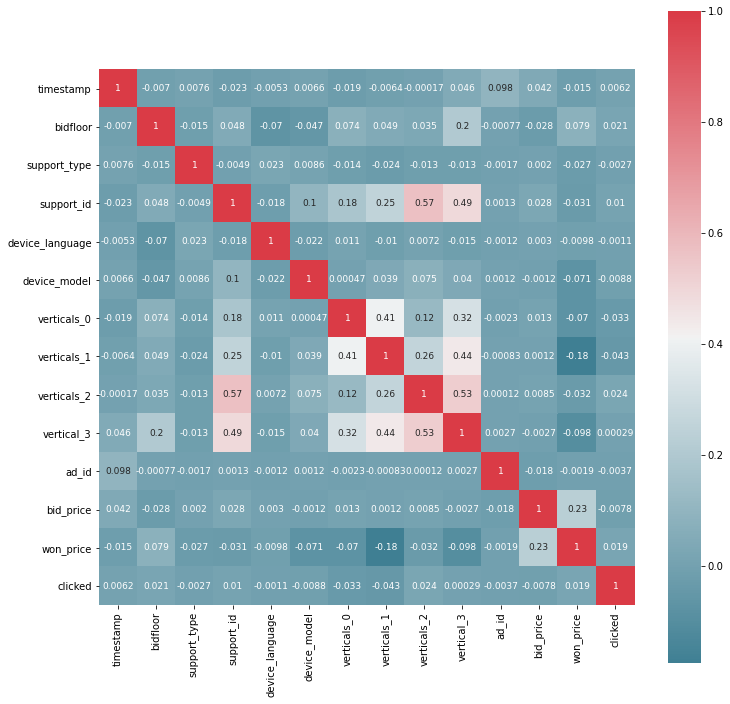

In [49]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : 1.2 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        )
plot_correlation_map( df )

In [51]:
#we can notice the correlated features such as support-id with (device_model, verticals_0, verticals_1, verticals_2, vertical_3) which are positively correlated.
#also, bid_price with won_price which are positively correlated.
#also, the correlation between the verticals.

In [52]:
df.clicked.unique()

array([0, 1], dtype=int64)

Visualization:

C:\Users\xps\anaconda3\envs\Need\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


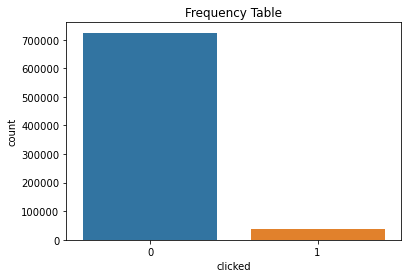

In [53]:
# Visualize the response variable.
sns.countplot(df.clicked).set_title("Frequency Table")
plt.show()

<AxesSubplot:xlabel='bid_price', ylabel='won_price'>

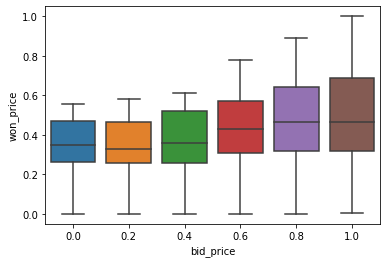

In [53]:
# Multiple Boxplots for correlated features.
sns.boxplot(x="bid_price", y="won_price", data=df)

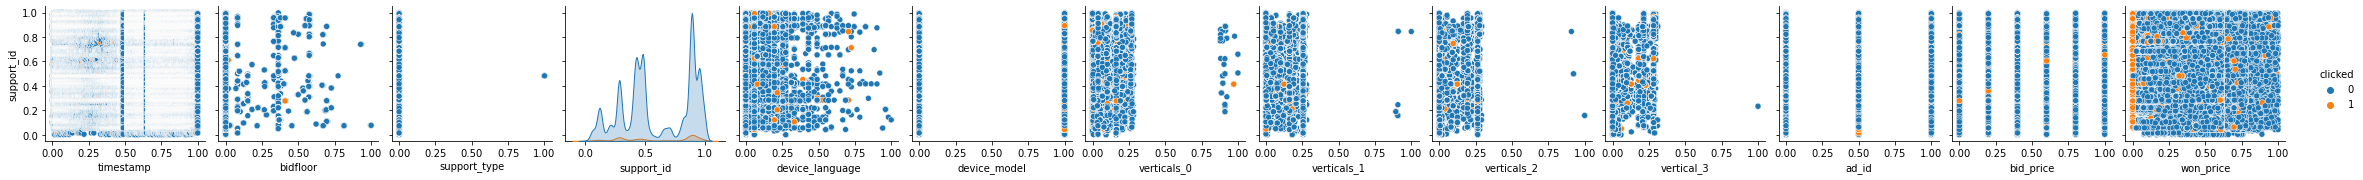

In [54]:
sns.pairplot(data=df, y_vars= 'support_id', kind='scatter', hue= 'clicked') 

Visualizing the distribution of the features over the entire dataset:

array([[<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'bidfloor'}>,
        <AxesSubplot:title={'center':'support_type'}>,
        <AxesSubplot:title={'center':'support_id'}>],
       [<AxesSubplot:title={'center':'device_language'}>,
        <AxesSubplot:title={'center':'device_model'}>,
        <AxesSubplot:title={'center':'verticals_0'}>,
        <AxesSubplot:title={'center':'verticals_1'}>],
       [<AxesSubplot:title={'center':'verticals_2'}>,
        <AxesSubplot:title={'center':'vertical_3'}>,
        <AxesSubplot:title={'center':'ad_id'}>,
        <AxesSubplot:title={'center':'bid_price'}>],
       [<AxesSubplot:title={'center':'won_price'}>,
        <AxesSubplot:title={'center':'clicked'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

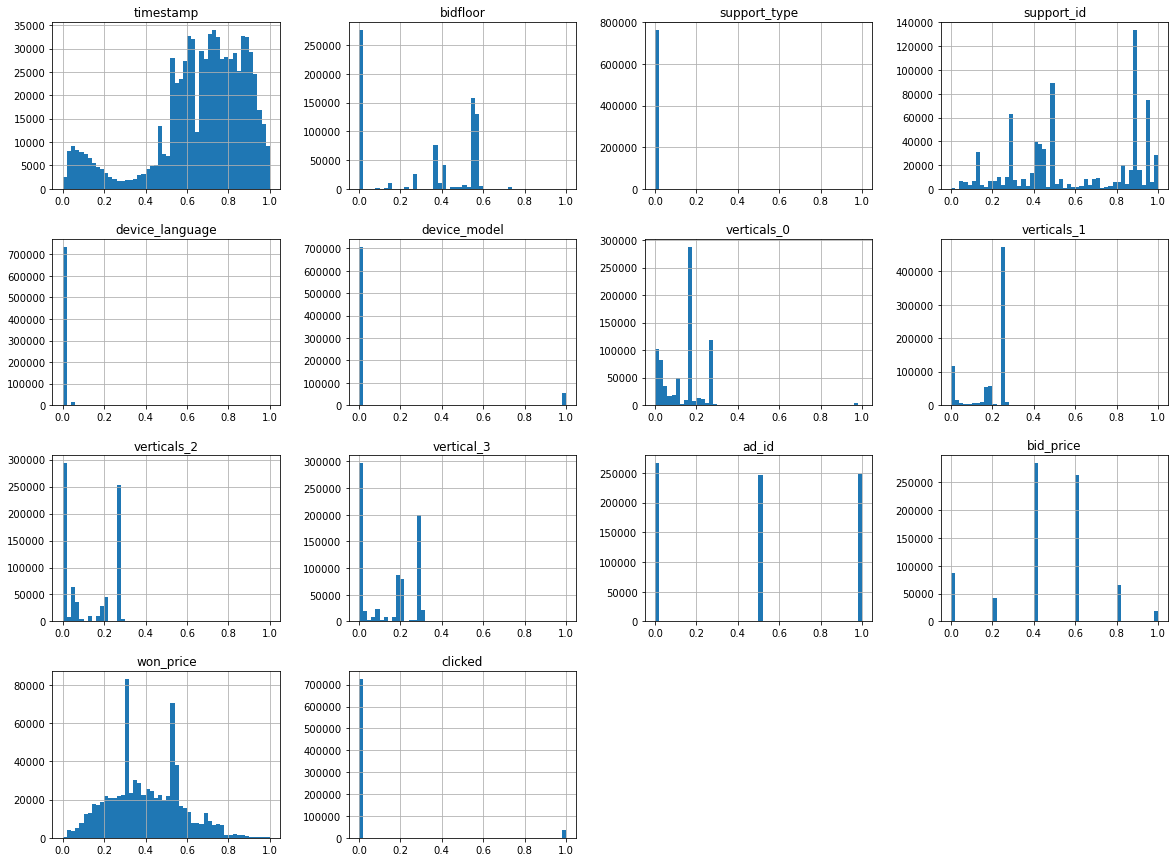

In [55]:
df.hist(bins=50, figsize=(20,15))

Visualizing the distribution of clicked and non-clicked ads dependind on device_model iphone and ipod respectively

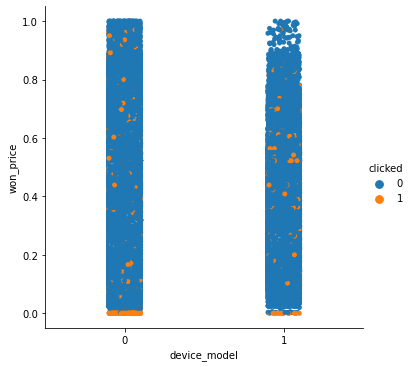

In [54]:
sns.catplot(x='device_model', y='won_price', data=df, hue='clicked')

=> not quite different!

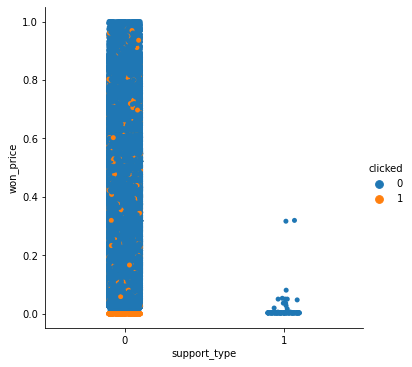

In [77]:
#repeated with support_type either app or website respectively
sns.catplot(x='support_type', y='won_price', data=df, hue='clicked')

=> the examples provided in our dataset does not include clicked website ads, and the won price for not clicked ads of the same category are less expensive as compared to the app category.
And importantly, ads are more seen over apps than websites in this dataset!

In [55]:
df.columns

Index(['timestamp', 'bidfloor', 'support_type', 'support_id',
       'device_language', 'device_model', 'verticals_0', 'verticals_1',
       'verticals_2', 'vertical_3', 'ad_id', 'bid_price', 'won_price',
       'clicked'],
      dtype='object')

In [56]:
x= df[['timestamp', 'bidfloor',
       'support_type', 'support_id', 'device_language', 'device_model',
       'verticals_0', 'verticals_1', 'verticals_2', 'vertical_3', 'ad_id',
       'bid_price', 'won_price']]
y= df['clicked']

In [57]:
print(x.shape, y.shape)

(762239, 13) (762239,)


C:\Users\xps\anaconda3\envs\Need\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


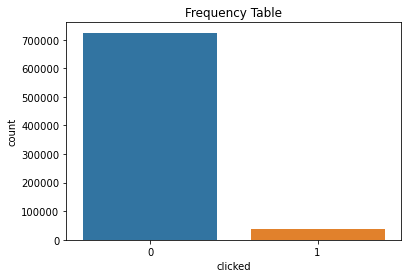

In [58]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

In [59]:
#splitting our data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)  #splitting data

In [60]:
#modeling and acuuracy
model=RandomForestClassifier(n_estimators=860, min_samples_split=6,max_features="log2", 
                           bootstrap=True, random_state=10)  
model.fit(x_train, y_train)  
y_pred=model.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.9453759095997761


In [61]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
y_pred.shape

(228672,)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    217467
           1       0.13      0.02      0.04     11205

    accuracy                           0.95    228672
   macro avg       0.54      0.51      0.50    228672
weighted avg       0.91      0.95      0.93    228672



The f1-score give us better intuition on the performance of the model compared to only the recall or the precision since it combines both last metrics especially when we have an imbalance in our dataset. 
we can notice that our model performs very well on the non-clicked ads class but fails to generalize that knowledge to the clicked class because our dataset is unbalanced!

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

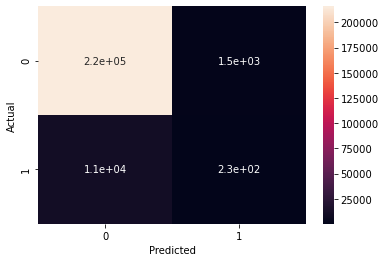

In [64]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Before starting analizing our confusion matrix, the number of tested samples is 228672, representing 30% of our dataset. 
We can notice that the recall of our confusion matrix is relatively good, since we have 220k ads which actually were not clicked and were correctly classified as not-clicked.
also, 2300 clicked ads were correctly classified as clicked despite the huge umbalance of our dataset, making our true positive rate good.
The false negative rate remains the smallest with 1.5k ads that were not clicked but classified as clicked.   

Our model needs more enhancements through data augmentation to reduce the difference between the classes so that the model won't bias towards a particular class!

In [71]:
import pickle

In [73]:
#Saving the model: #this is done once that's why it's commented

pickle.dump(model, open('model.pkl', 'wb'))


In [74]:
# load the model from disk.

loaded_model = pickle.load(open('model.pkl', 'rb'))



In [ ]:
#trying to predict an approximation of the first example of our dataset

In [76]:
print(loaded_model.predict([[0, 0.58, 0, 0.48,0,0, 0.26,0.25,0.02,0.18,0,0,0.32]]))

[0]


correctly classified as non_clicked ad